<a href="https://colab.research.google.com/github/sowmyarajesh/ML_CNN/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reference: https://www.cs.toronto.edu/~kriz/cifar.html

## Dataset

In [20]:
from tensorflow.keras.datasets import cifar10
(Xtrain,yTrain), (Xtest, yTest) = cifar10.load_data()

labelSet = [
            "0-airplane",
            "1-automobile",
            "2-bird",
            "3-cat",
            "4-deer",
            "5-dog",
            "6-frog",
            "7-horse",
            "8-ship",
            "9-truck"
            ]

In [21]:
print(Xtrain.shape, Xtest.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [22]:
Xtrain.min(), Xtrain.max(),  Xtest.min(), Xtest.max()

(0, 255, 0, 255)

In [24]:
yTrain.min(), yTrain.max(), yTest.min(), yTest.max()

(0, 9, 0, 9)

Normalize the images

In [25]:
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

In [26]:
Xtrain.min(),  Xtrain.max(), Xtest.min(), Xtest.max()

(0.0, 1.0, 0.0, 1.0)

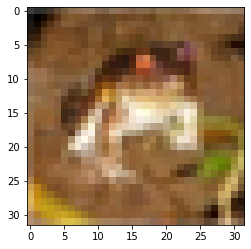

In [27]:
plt.imshow(Xtrain[0])

## Build the model

In [41]:
model = tf.keras.models.Sequential()

cnn_layer1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding='same',activation ='relu', input_shape=(32,32,3) )
cnn_layer2 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding='same',activation ='relu' )
maxpool_layer1 = tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid')
cnn_layer3 = tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same',activation ='relu' )
cnn_layer4 = tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same',activation ='relu' )
maxpool_layer2 = tf.keras.layers.MaxPool2D(pool_size = 3, strides = 3, padding='valid')
dropout_layer = tf.keras.layers.Dropout(0.2) # regularization technique
flatten_layer = tf.keras.layers.Flatten()
dense_layer1 = tf.keras.layers.Dense(units=128, activation='relu')
dense_layer2 = tf.keras.layers.Dense(units=10, activation='softmax') # output layer


model.add(cnn_layer1)
model.add(cnn_layer2)
model.add(maxpool_layer1)
model.add(cnn_layer3)
model.add(cnn_layer4)
model.add(maxpool_layer2)
model.add(dropout_layer)
model.add(flatten_layer)
model.add(dense_layer1)
model.add(dense_layer2)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

## Train

In [42]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics =['sparse_categorical_accuracy'])

In [43]:
model.fit(Xtrain,yTrain, batch_size=100, epochs=20)

Epoch 1/20
500/500 [==============================] - 243s 484ms/step - loss: 1.5251 - sparse_categorical_accuracy: 0.4485
Epoch 2/20
500/500 [==============================] - 242s 483ms/step - loss: 1.0709 - sparse_categorical_accuracy: 0.6201
Epoch 3/20
500/500 [==============================] - 240s 480ms/step - loss: 0.8949 - sparse_categorical_accuracy: 0.6843
Epoch 4/20
500/500 [==============================] - 239s 479ms/step - loss: 0.7844 - sparse_categorical_accuracy: 0.7246
Epoch 5/20
500/500 [==============================] - 240s 479ms/step - loss: 0.7126 - sparse_categorical_accuracy: 0.7504
Epoch 6/20
500/500 [==============================] - 240s 479ms/step - loss: 0.6482 - sparse_categorical_accuracy: 0.7744
Epoch 7/20
500/500 [==============================] - 239s 478ms/step - loss: 0.5884 - sparse_categorical_accuracy: 0.7929
Epoch 8/20
500/500 [==============================] - 239s 479ms/step - loss: 0.5488 - sparse_categorical_accuracy: 0.8071
Epoch 9/20
500/5

## Evaluate

In [44]:
test_loss, test_acc = model.evaluate(Xtest,yTest)

313/313 [==============================] - 13s 41ms/step - loss: 0.7652 - sparse_categorical_accuracy: 0.7805


In [45]:
test_acc

0.7804999947547913